In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


## 資料預處理 (Data Preprocessing)

In [2]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 載入資料
data_train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

num_classes = 10 # 標籤總共有10類
img_rows, img_cols, img_channels = 28, 28, 1 # 圖像是 28像素 x 28像素 (灰階: 1)
input_shape = (img_rows, img_cols, img_channels) # (圖像的height, 圖像的width, 圖像的顏色通道數channel)

X = np.array(data_train.iloc[:, 1:]) # Dataframe中 idx(1 ~ 784)的欄都是像素值

# 進行標籤的one-hot編碼
y = to_categorical(np.array(data_train.iloc[:, 0])) # Dataframe 中 idx(0)的欄是標籤

# 把訓練資料進行拆分成訓練(80%)與驗證(20%)資料集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# 測試資料的處理
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

# 對向量進行shape的轉換以符合訓練的input要求
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# 對每個像素進行型別轉換與歸一化
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

Using TensorFlow backend.


## 網絡模型 (Model)構建

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_model_six_conv(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model;

In [4]:
from keras.optimizers import Adam

batch_size = 256
epochs = 50

#圖像的shape是 (28,28,1)
model = create_model_six_conv((img_rows, img_cols, img_channels)) # 初始化一個模型

# 秀出模型架構
model.summary() 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

## 訓練 (Training)

In [5]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 140us/step - loss: 0.9266 - accuracy: 0.6553 - val_loss: 0.5044 - val_accuracy: 0.8069
Epoch 2/50
48000/48000 [==============================] - 3s 57us/step - loss: 0.5088 - accuracy: 0.8154 - val_loss: 0.3919 - val_accuracy: 0.8514
Epoch 3/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.4141 - accuracy: 0.8498 - val_loss: 0.3300 - val_accuracy: 0.8777
Epoch 4/50
48000/48000 [==============================] - 3s 57us/step - loss: 0.3586 - accuracy: 0.8725 - val_loss: 0.2989 - val_accuracy: 0.8895
Epoch 5/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.3305 - accuracy: 0.8830 - val_loss: 0.3019 - val_accuracy: 0.8898
Epoch 6/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.3056 - accuracy: 0.8924 - val_loss: 0.2633 - val_accuracy: 0.9038
Epoch 7/50
48000/48000 [==============================] - 3s 57us/s

## 訓練過程的可視化

ValueError: x, y, and format string must not be None

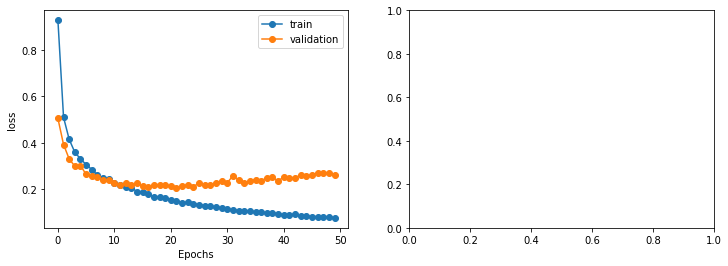

In [6]:
# 透過趨勢圖來觀察訓練與驗證的走向 (特別去觀察是否有"過擬合(overfitting)"的現象)
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')

plt.subplot(1,2,2)
plot_train_history(history, 'accuracy','val_accuracy')

plt.show()

## 驗證評估 (Evaluation) 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

## 每一種類別的預測正確率

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
corrects = np.nonzero(predicted_classes==y_true)[0]
incorrects = np.nonzero(predicted_classes!=y_true)[0]

In [ ]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

#### 正確辨識的圖像範例:

In [ ]:
for i, correct in enumerate(corrects[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()
    
plt.show()

#### 辨識錯誤的圖像範例

In [ ]:
for i, incorrect in enumerate(incorrects[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()
    
plt.show()